In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

print(tf.__version__)

Num GPUs Available:  1
2.5.0


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPool2D
from keras.layers import Conv2D, MaxPooling2D
#from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image
import os
import shutil
from shutil import copyfile
from os import getcwd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage import io, color, exposure
import random
import math
from skimage.transform import resize
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
%matplotlib inline

In [30]:
image_names = os.listdir("E:\\Study\\Thesis\\Datasets\\DR\\main train\\main train\\")
src_path = "E:\\Study\\Thesis\\Datasets\\DR\\main train\\main train"
training_path = "F:\\DR Data"
for fname in image_names:
    truncated = False
    if os.path.getsize(os.path.join(src_path, fname) ) != 0:
        row = train.loc[train['image'] == fname[:-5]]
        level = row['level'].values[0]
        destination_dir = os.path.join(training_path,str(level))
        src = os.path.join(src_path, fname) #deleting images.
        try:
            # try to open that image and load the data
            Image.open(src).load()
        except Exception as e:
            truncated = True
        if(not truncated):
            copyfile(src,os.path.join(destination_dir, fname))

In [35]:

base_src = "F:\\DR Data"
data = {}

image_list = os.listdir(os.path.join(base_src,"0"))
data["No DR"] = 25624

image_list = os.listdir(os.path.join(base_src,"1"))
data["Mild DR"] = len(image_list)

image_list = os.listdir(os.path.join(base_src,"2"))
data["Moderate DR"] = len(image_list)

image_list = os.listdir(os.path.join(base_src,"3"))
data["Severe DR"] = len(image_list)

image_list = os.listdir(os.path.join(base_src,"4"))
data["Proliferative DR"] = len(image_list)


print(data)

{'No DR': 25624, 'Mild DR': 2416, 'Moderate DR': 5254, 'Severe DR': 870, 'Proliferative DR': 707}


<AxesSubplot:>

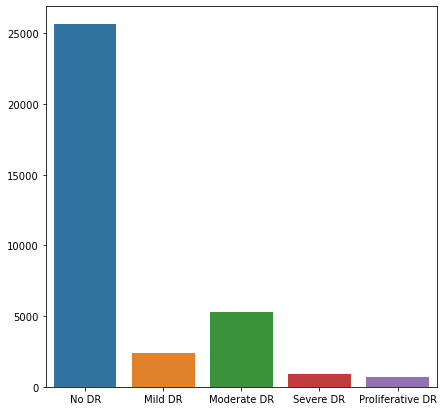

In [36]:


fig, ax = plt.subplots(figsize=(7,7))
keys = list(data.keys())
vals = []
# get values in the same order as keys, and parse percentage values
for i in keys:
    vals.append(data[i])
sns.barplot(ax=ax, x=keys, y=vals)

### Downsampling 0

In [36]:
import random
import math

src = "F:\\DR Data\\0"
src_list = os.listdir(src)
random.shuffle(src_list)
src_length = len(src_list)
print("before deleting: ",src_length)
breakpoint = math.ceil(src_length*0.7)
for i in range(0,breakpoint):
    path = os.path.join(src,src_list[i])
    os.remove(path)
src_list = os.listdir(src)
src_length = len(src_list)
print("after deleting: ",src_length)


before deleting:  25624
after deleting:  7687


In [45]:
image_list = os.listdir(os.path.join(base_src,"0"))
data["No DR"] = len(image_list)

print(data)

{'No DR': 7687, 'Mild DR': 2419, 'Moderate DR': 5257, 'Severe DR': 870, 'Proliferative DR': 708}


<AxesSubplot:>

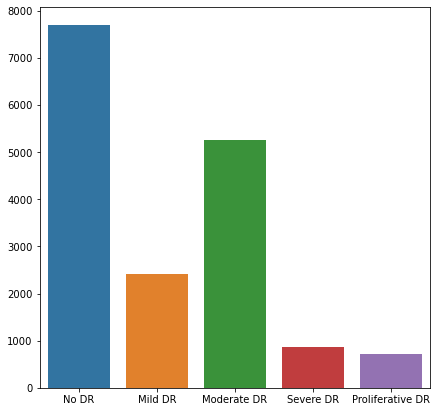

In [46]:
fig, ax = plt.subplots(figsize=(7,7))
keys = list(data.keys())
vals = []
# get values in the same order as keys, and parse percentage values
for i in keys:
    vals.append(data[i])
sns.barplot(ax = ax, x=keys, y=vals)

### plotting functions

In [47]:
def plot_hist(I , nbins = 256, normalize = False, plot_cdf = True):
    hist, bins_hist = exposure.histogram(I.ravel(), nbins=256, normalize = normalize)
    plt.plot(bins_hist, hist , 'k')
    plt.xlabel("Pixel Values")
    plt.ylabel("Count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0,xmax])
    
    if plot_cdf:
        cdf, bins_hist = exposure.cumulative_distribution(I.ravel(), nbins=256)
        plt.twinx()
        plt.plot(bins_hist, cdf , 'r', lw = 3)
        plt.ylabel("Percantage")



In [48]:
# Plot the Image and its histogram + cdf of the grayscale image I_gray


def plot_img_and_hist(I):
    plt.rcParams['figure.figsize'] = (10,10)
    plt.subplot(2, 1, 1)
    io.imshow(I)
    plt.axis("off")
    plt.title("image")
  
    plt.subplot(2, 1, 2)
    plot_hist(I)
    plt.title("histogram")

# YOUR CODE HERE


### Adaptive Histogram Equalization Methods

In [7]:
def adaptive_histogram(I):
    I_lab = color.rgb2lab(I)
    I_lab[:,:,0] = I_lab[:,:,0]/100

    I_recon_l = exposure.equalize_adapthist(I_lab[:,:,0], kernel_size = (120,120), clip_limit = 0.01)
    I_recon_l = I_recon_l * 100

    I_lab[:,:,0] = I_recon_l

    I_recon_color = color.lab2rgb(I_lab)

    return I_recon_color

### No DR

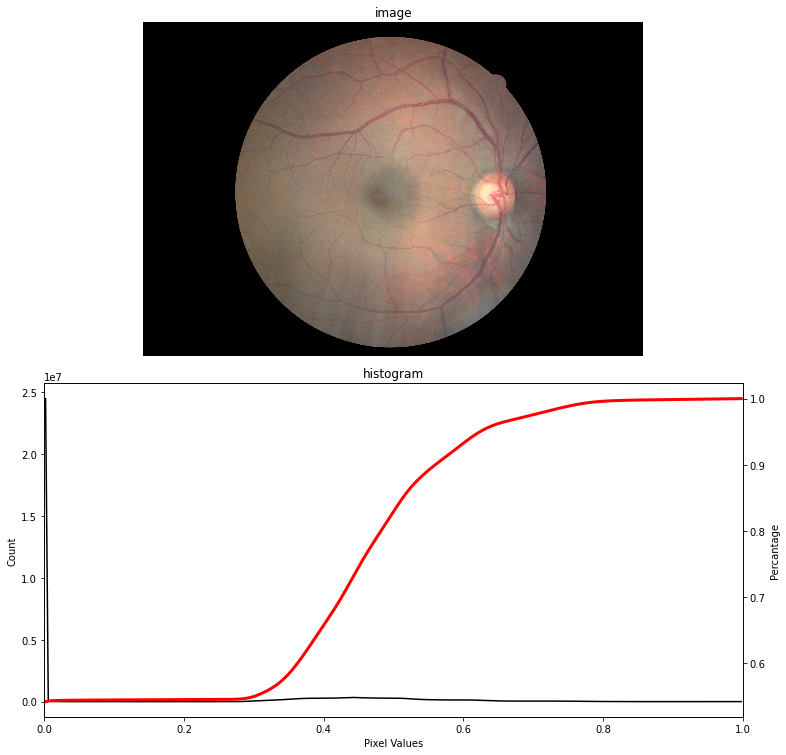

In [74]:
nameList_0 = os.listdir("F:\\DR Data\\0\\")
I = io.imread(os.path.join(src,nameList_0[random.randint(0, len(nameList_0))]))
I = I/255

# YOUR CODE HERE
plot_img_and_hist(I)

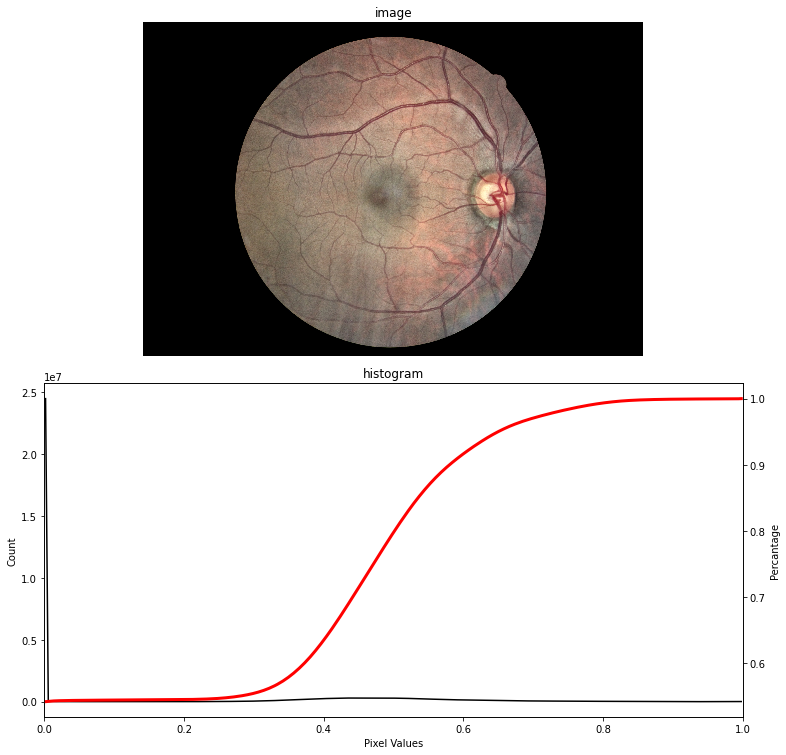

In [75]:
# Equalize the histogram of the degraded color image I_rgb_degraded using CLAHE
# Save the result in I_recon_color, display the image along with its histogram
# HINT: You have to convert to LAB first
# See the lecture and lecture-4-demo-codes

I_contrast = adaptive_histogram(I)
plot_img_and_hist(I_contrast)

### Mild DR

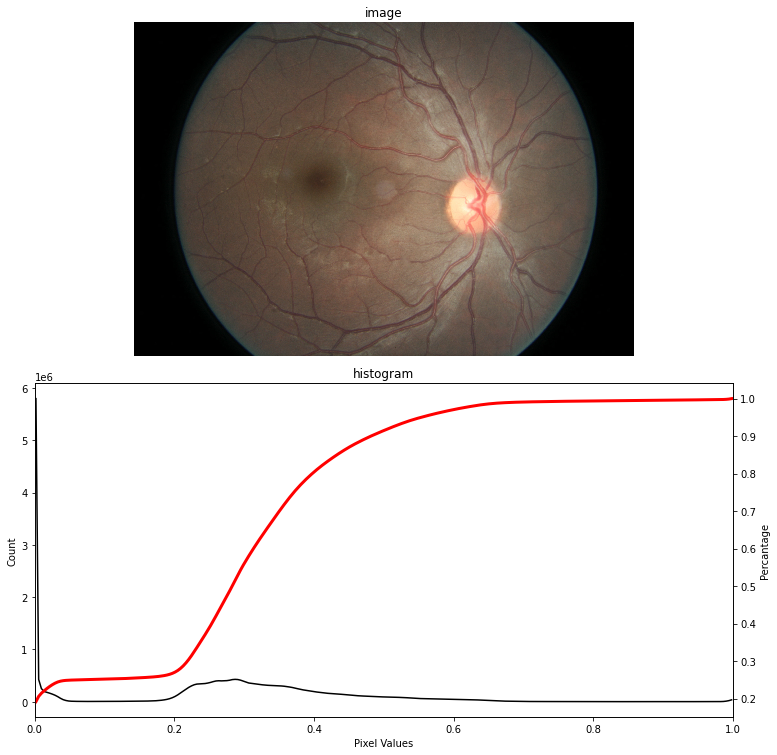

In [70]:
nameList_1 = os.listdir("F:\\DR Data\\1\\")
I1 = io.imread(os.path.join("F:\\DR Data\\1\\",nameList_1[random.randint(0, len(nameList_1))]))
I1 = I1/255

# YOUR CODE HERE
plot_img_and_hist(I1)

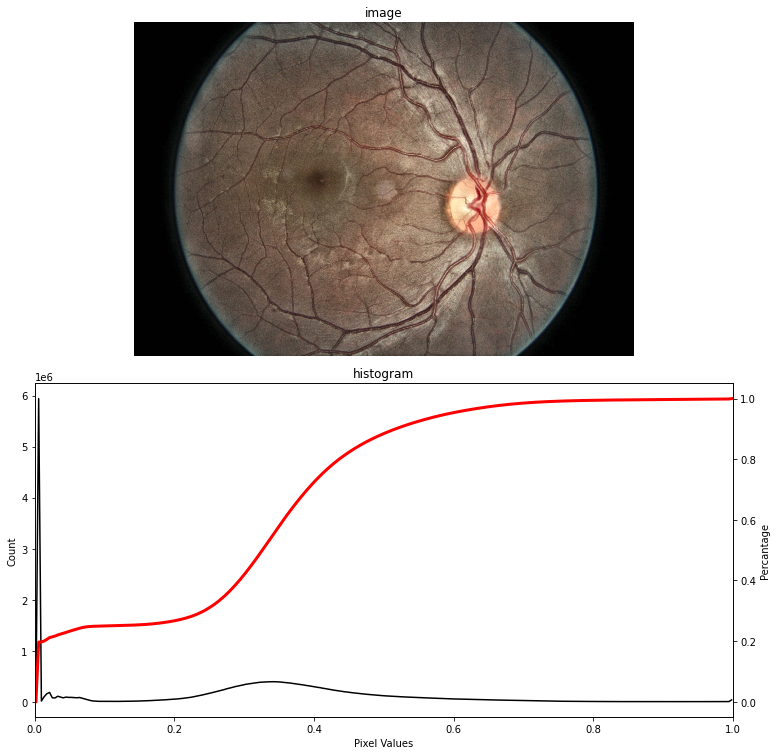

In [71]:
# Equalize the histogram of the degraded color image I_rgb_degraded using CLAHE
# Save the result in I_recon_color, display the image along with its histogram
# HINT: You have to convert to LAB first
# See the lecture and lecture-4-demo-codes

I1_contrast = adaptive_histogram(I1)
plot_img_and_hist(I1_contrast)

### Moderate DR

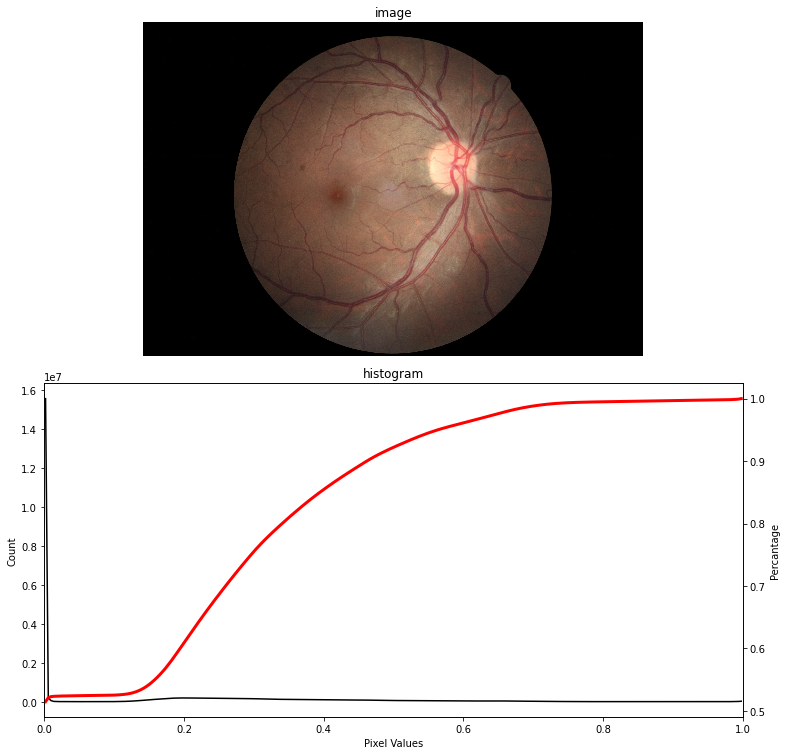

In [77]:
nameList_2 = os.listdir("F:\\DR Data\\2\\")
I2 = io.imread(os.path.join("F:\\DR Data\\2\\",nameList_2[random.randint(0, len(nameList_2))]))
I2 = I2/255

# YOUR CODE HERE
plot_img_and_hist(I2)

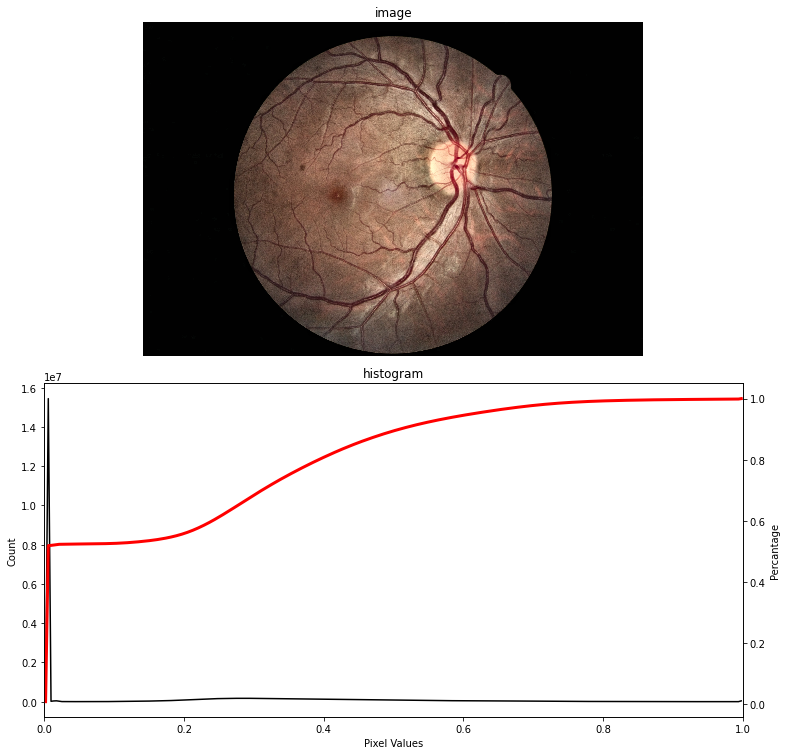

In [78]:
I2_contrast = adaptive_histogram(I2)
plot_img_and_hist(I2_contrast)

### Severe DR

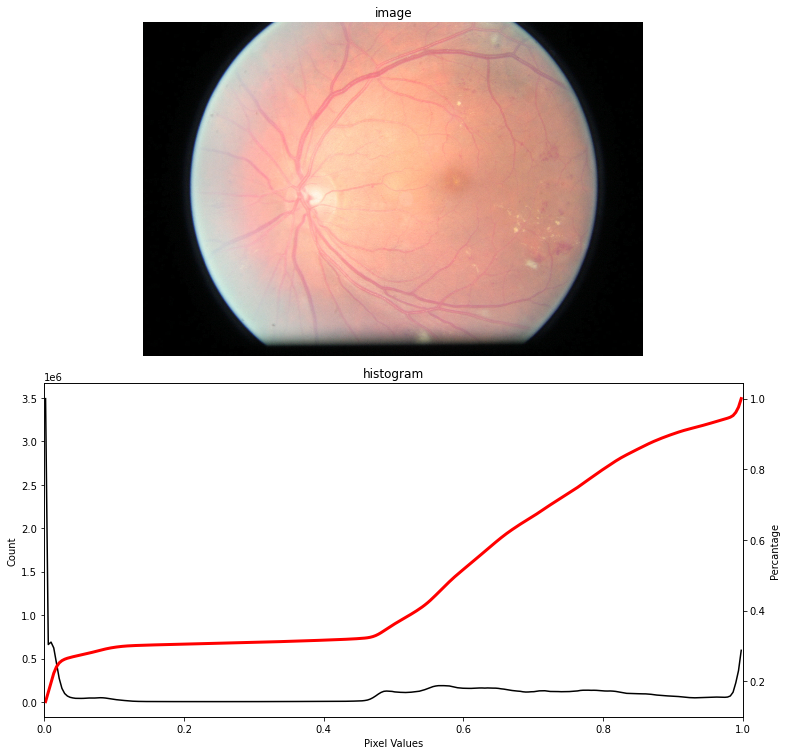

In [79]:
nameList_3 = os.listdir("F:\\DR Data\\3\\")
I3 = io.imread(os.path.join("F:\\DR Data\\3\\",nameList_3[random.randint(0, len(nameList_3))]))
I3 = I3/255

# YOUR CODE HERE
plot_img_and_hist(I3)

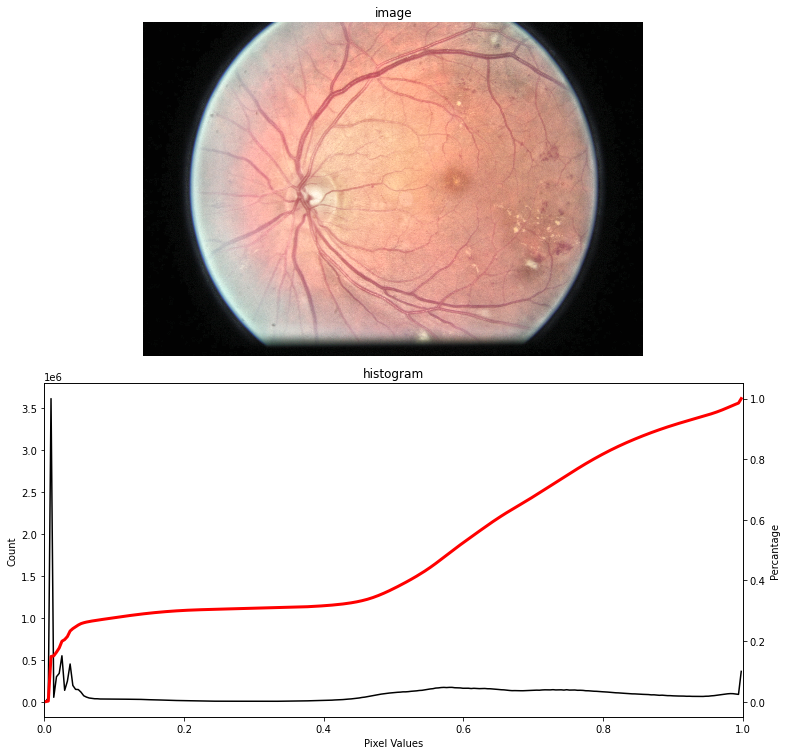

In [80]:
I3_contrast = adaptive_histogram(I3)
plot_img_and_hist(I3_contrast)

### Proliferative DR

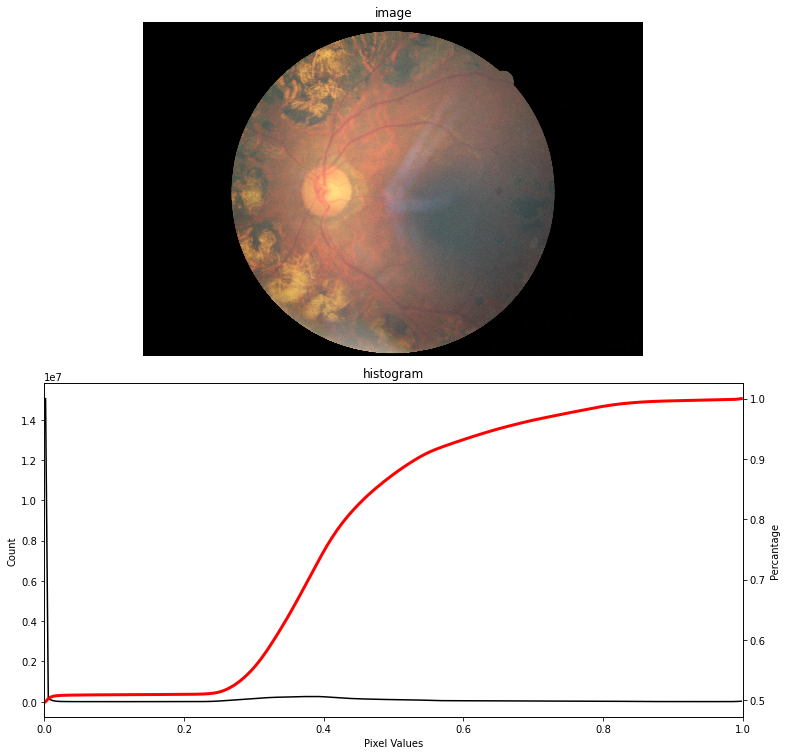

In [92]:
nameList_4 = os.listdir("F:\\DR Data\\4\\")
I4 = io.imread(os.path.join("F:\\DR Data\\4\\",nameList_4[0]))
I4 = I4/255

# YOUR CODE HERE
plot_img_and_hist(I4)

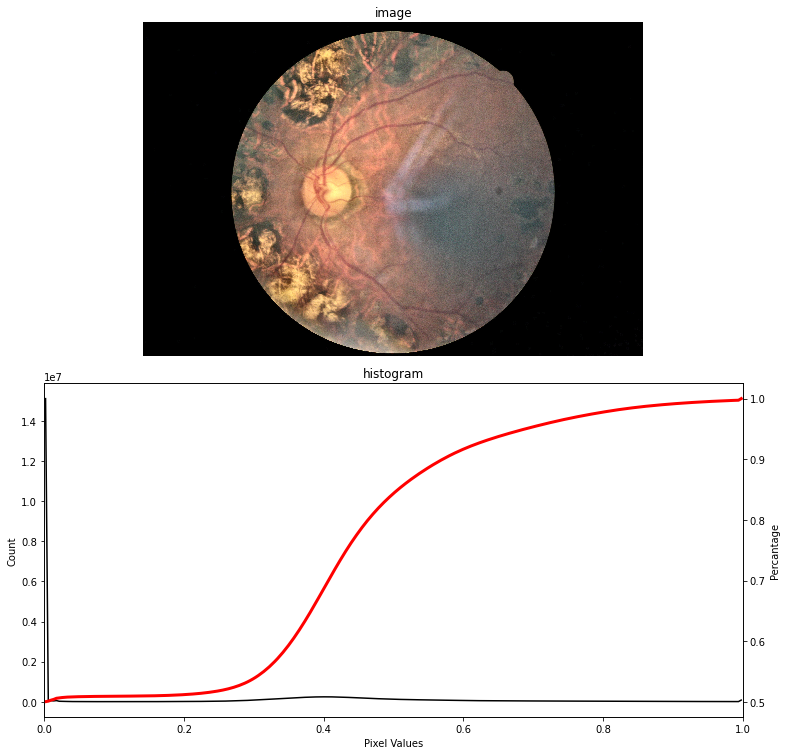

In [93]:
I4_contrast = adaptive_histogram(I4)
plot_img_and_hist(I4_contrast)

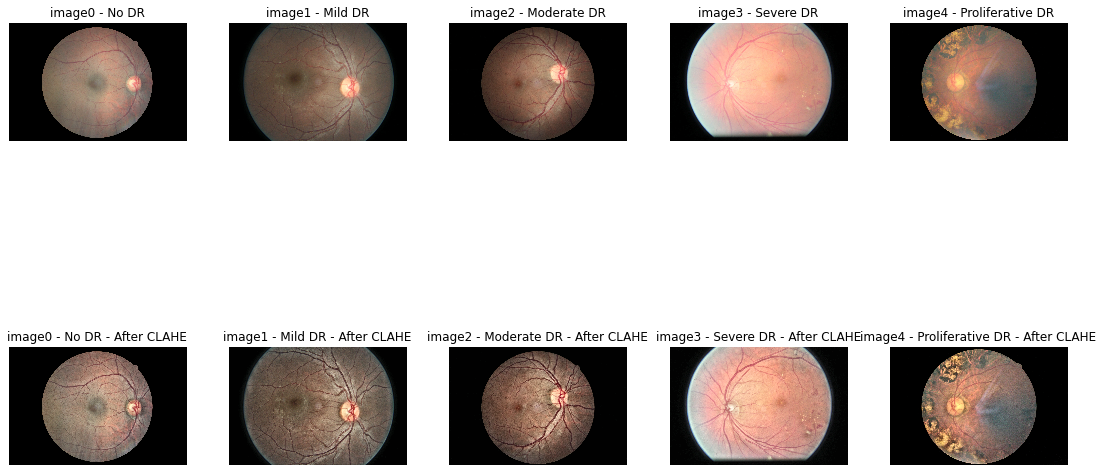

In [94]:
plt.rcParams['figure.figsize'] = (15,15)

plt.subplot(3, 5, 1)
io.imshow(I)
plt.axis("off")
plt.title("image0 - No DR")

plt.subplot(3, 5, 2)
io.imshow(I1)
plt.axis("off")
plt.title("image1 - Mild DR")

plt.subplot(3, 5, 3)
io.imshow(I2)
plt.axis("off")
plt.title("image2 - Moderate DR")

plt.subplot(3, 5, 4)
io.imshow(I3)
plt.axis("off")
plt.title("image3 - Severe DR")

plt.subplot(3, 5, 5)
io.imshow(I4)
plt.axis("off")
plt.title("image4 - Proliferative DR")

# second row

plt.subplot(3, 5, 6)
io.imshow(I_contrast)
plt.axis("off")
plt.title("image0 - No DR - After CLAHE")

plt.subplot(3, 5, 7)
io.imshow(I1_contrast)
plt.axis("off")
plt.title("image1 - Mild DR - After CLAHE")

plt.subplot(3, 5, 8)
io.imshow(I2_contrast)
plt.axis("off")
plt.title("image2 - Moderate DR - After CLAHE")

plt.subplot(3, 5, 9)
io.imshow(I3_contrast)
plt.axis("off")
plt.title("image3 - Severe DR - After CLAHE")

plt.subplot(3, 5, 10)
io.imshow(I4_contrast)
plt.axis("off")
plt.title("image4 - Proliferative DR - After CLAHE")


plt.show()

In [14]:
from skimage.util import img_as_ubyte
def image_contras_and_save(name_list, src,dest):
    for fname in name_list:
        path = os.path.join(src,fname)
        dest_path = os.path.join(dest,fname)
        I_before = io.imread(path)
        I_before = I_before/255
        I_after = adaptive_histogram(I_before)
        
        in_hsv_h=img_as_ubyte(I_after)
        io.imsave(dest_path,in_hsv_h)

In [12]:
src = "G:\\0\\AFTER DOWNSAMPLE BACKUP\\0\\"
lst = os.listdir(src)
dest = "G:\\0\\AFTER DOWNSAMPLE BACKUP\\0 after clahe\\"
image_contras_and_save(name_list = lst, src = src, dest = dest)

C:\Users\fahim\Anaconda3\lib\site-packages\skimage\color\colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 1 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\fahim\Anaconda3\lib\site-packages\skimage\color\colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 20 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\fahim\Anaconda3\lib\site-packages\skimage\color\colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 12 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\fahim\Anaconda3\lib\site-packages\skimage\color\colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 16 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\fahim\Anaconda3\lib\site-packages\skimage\color\colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 2 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\fahim\Anaconda3\lib\site-packages\skimage\color\colorconv.py:11

In [17]:
src = "G:\\0\\AFTER DOWNSAMPLE BACKUP\\1\\"
lst = os.listdir(src)
dest = "G:\\0\\AFTER DOWNSAMPLE BACKUP\\1 after clahe\\"
image_contras_and_save(name_list = lst, src = src, dest = dest)

C:\Users\fahim\Anaconda3\lib\site-packages\skimage\color\colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 80 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\fahim\Anaconda3\lib\site-packages\skimage\color\colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 440 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\fahim\Anaconda3\lib\site-packages\skimage\color\colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 27 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\fahim\Anaconda3\lib\site-packages\skimage\color\colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 164 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\fahim\Anaconda3\lib\site-packages\skimage\color\colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 180 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\fahim\Anaconda3\lib\site-packages\skimage\color\colorconv.

In [38]:
src = "G:\\0\\AFTER DOWNSAMPLE BACKUP\\2\\"
lst = os.listdir(src)
dest = "G:\\0\\AFTER DOWNSAMPLE BACKUP\\2 after clahe\\"
image_contras_and_save(name_list = lst, src = src, dest = dest)

C:\Users\fahim\Anaconda3\lib\site-packages\skimage\color\colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 177 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\fahim\Anaconda3\lib\site-packages\skimage\color\colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 318 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\fahim\Anaconda3\lib\site-packages\skimage\color\colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 111 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\fahim\Anaconda3\lib\site-packages\skimage\color\colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 61 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\fahim\Anaconda3\lib\site-packages\skimage\color\colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 266 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\fahim\Anaconda3\lib\site-packages\skimage\color\colorconv

In [16]:
src = "G:\\0\\AFTER DOWNSAMPLE BACKUP\\3\\"
lst = os.listdir(src)
dest = "G:\\0\\AFTER DOWNSAMPLE BACKUP\\3 after clahe\\"
image_contras_and_save(name_list = lst, src = src, dest = dest)

C:\Users\fahim\Anaconda3\lib\site-packages\skimage\color\colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 124 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\fahim\Anaconda3\lib\site-packages\skimage\color\colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 44 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


In [15]:
src = "G:\\0\\AFTER DOWNSAMPLE BACKUP\\4\\"
lst = os.listdir(src)
dest = "G:\\0\\AFTER DOWNSAMPLE BACKUP\\4 after clahe\\"
image_contras_and_save(name_list = lst, src = src, dest = dest)

C:\Users\fahim\Anaconda3\lib\site-packages\skimage\color\colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 2913 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


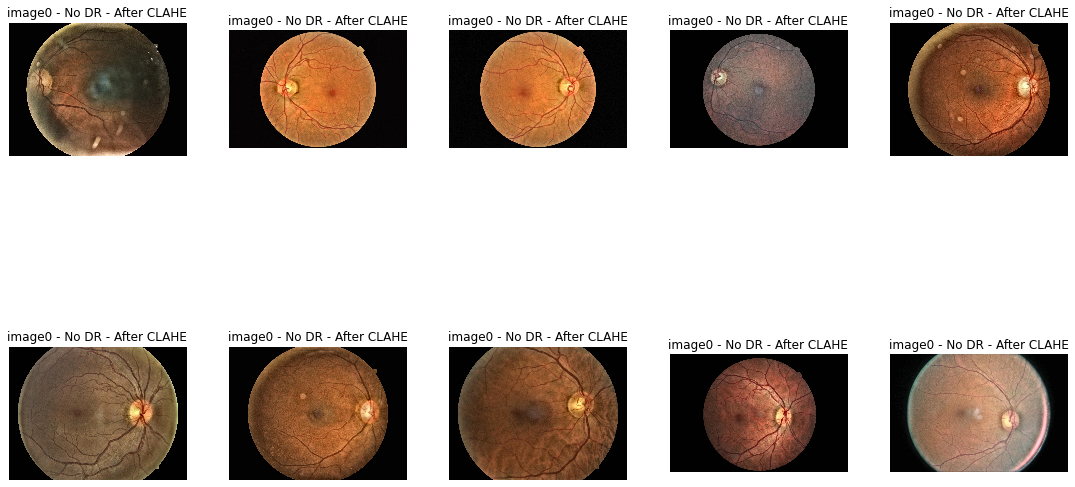

In [29]:
plt.rcParams['figure.figsize'] = (15,15)
src = "G:\\0\\AFTER DOWNSAMPLE BACKUP\\0 after clahe"
lst = os.listdir(src)
for i in range(1,11):
    plt.subplot(3,5,i)
    io.imshow(os.path.join(src,lst[i]))
    plt.axis("off")
    plt.title("image0 - No DR - After CLAHE")
    
    

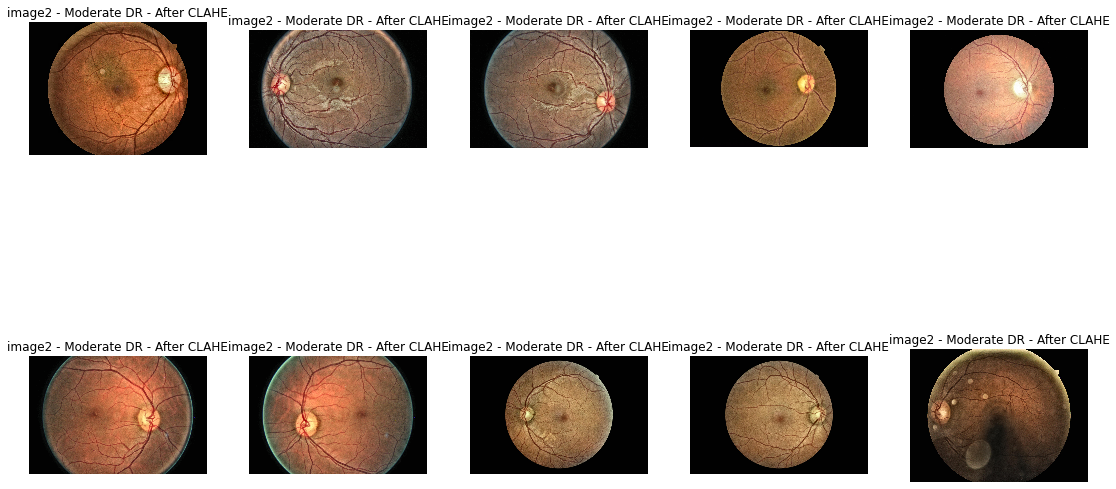

In [26]:
plt.rcParams['figure.figsize'] = (15,15)
src = "G:\\0\\AFTER DOWNSAMPLE BACKUP\\1 after clahe"
lst = os.listdir(src)
for i in range(1,11):
    plt.subplot(3,5,i)
    io.imshow(os.path.join(src,lst[i]))
    plt.axis("off")
    plt.title("image1 - Mild DR - After CLAHE")
    

In [ ]:
plt.rcParams['figure.figsize'] = (15,15)
src = "G:\\0\\AFTER DOWNSAMPLE BACKUP\\2 after clahe"
lst = os.listdir(src)
for i in range(1,11)
    plt.subplot(3,5,i)
    io.imshow(os.path.join(src,lst[i]))
    plt.axis("off")
    plt.title("image2 - Moderate DR - After CLAHE")
    

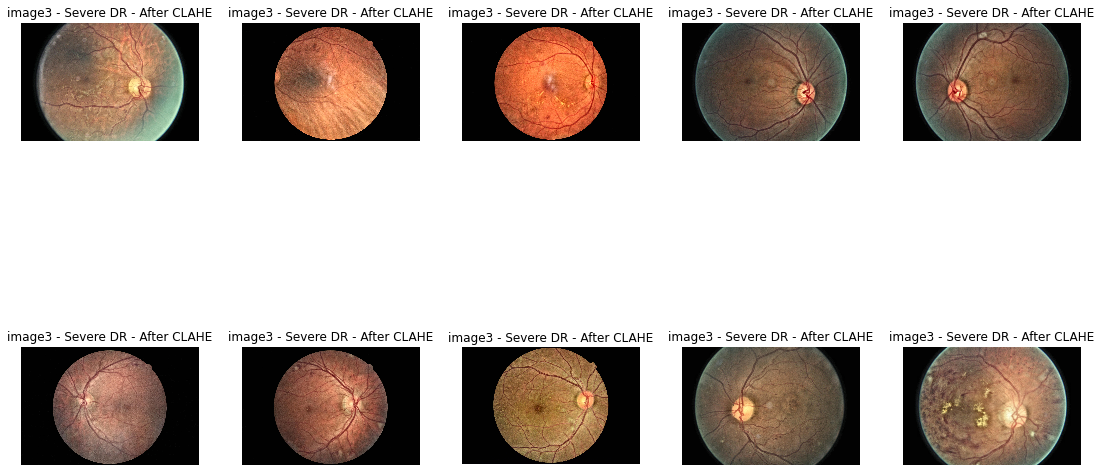

In [33]:
plt.rcParams['figure.figsize'] = (15,15)
src = "G:\\0\\AFTER DOWNSAMPLE BACKUP\\3 after clahe"
lst = os.listdir(src)
for i in range(1,11):
    plt.subplot(3,5,i)
    io.imshow(os.path.join(src,lst[i]))
    plt.axis("off")
    plt.title("image3 - Severe DR - After CLAHE")
    

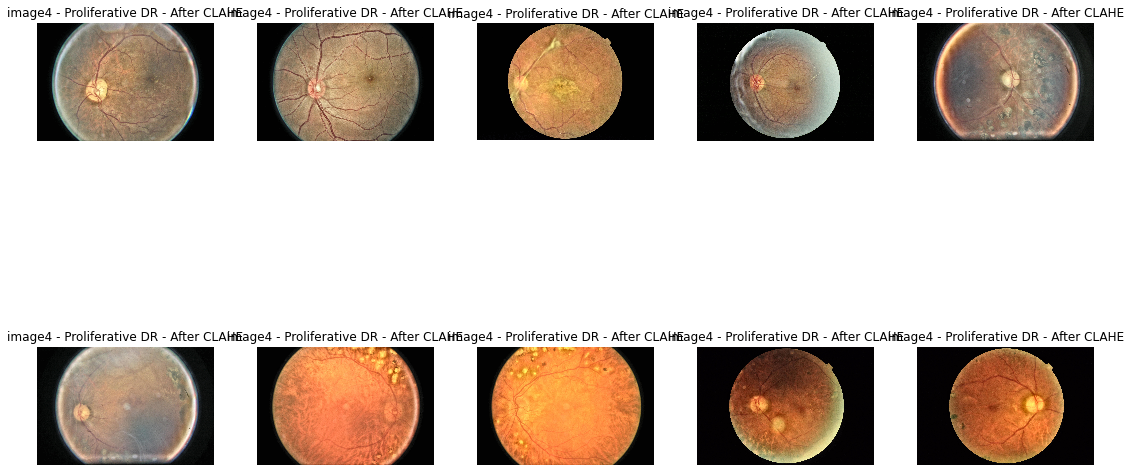

In [34]:
plt.rcParams['figure.figsize'] = (15,15)
src = "G:\\0\\AFTER DOWNSAMPLE BACKUP\\4 after clahe"
lst = os.listdir(src)
for i in range(1,11):
    plt.subplot(3,5,i)
    io.imshow(os.path.join(src,lst[i]))
    plt.axis("off")
    plt.title("image4 - Proliferative DR - After CLAHE")
    

In [18]:

def multiply_image(src, multiple = 0):
    image_names = os.listdir(src)
    print(len(image_names))
    for fname in image_names:
        src_old = os.path.join(src, fname)
        for i in range(0,multiple):
            new_fname = fname + "copy" + str(i) 
            copyfile(src_old,os.path.join(src, new_fname+".jpg"))
            

In [20]:
src = "F:\\Clahe DR\\Severe DR\\"
multiply_image(src = src, multiple = 7)

870


In [34]:
src = "F:\\Clahe DR\\Proliferative DR\\"
multiply_image(src = src, multiple = 8)

706


In [22]:
src = "F:\\Clahe DR\\Mild DR\\"
multiply_image(src = src, multiple = 2)

2416


### Increase Moderate DR

In [32]:
src = "F:\\Clahe DR\\Moderate DR\\"
Image_names = os.listdir(src)

Image_names = random.sample(Image_names,len(Image_names))
first_half = Image_names[:2001]
for fname in first_half:
    src_old = os.path.join(src, fname)
    new_fname = fname + "copy" + str(i) 
    copyfile(src_old,os.path.join(src, new_fname+".jpg"))


### Visualize Data

In [35]:

base_src = "F:\\Clahe DR"
data = {}

image_list = os.listdir(os.path.join(base_src,"No DR"))
data["No DR"] = len(image_list)

image_list = os.listdir(os.path.join(base_src,"Mild DR"))
data["Mild DR"] = len(image_list)

image_list = os.listdir(os.path.join(base_src,"Moderate DR"))
data["Moderate DR"] = len(image_list)

image_list = os.listdir(os.path.join(base_src,"Severe DR"))
data["Severe DR"] = len(image_list)

image_list = os.listdir(os.path.join(base_src,"Proliferative DR"))
data["Proliferative DR"] = len(image_list)


print(data)

{'No DR': 7681, 'Mild DR': 7248, 'Moderate DR': 7255, 'Severe DR': 6960, 'Proliferative DR': 6354}


<AxesSubplot:>

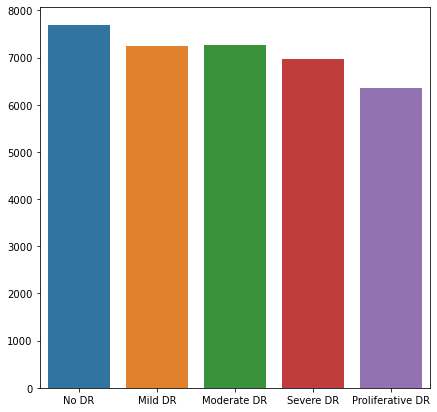

In [37]:
fig, ax = plt.subplots(figsize=(7,7))
keys = list(data.keys())
vals = []
# get values in the same order as keys, and parse percentage values
for i in keys:
    vals.append(data[i])
sns.barplot(ax=ax, x=keys, y=vals)

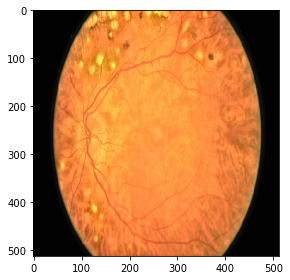

In [80]:
fname = os.listdir("G:\\0\\AFTER DOWNSAMPLE BACKUP\\4 after clahe\\")
image = io.imread("G:\\0\\AFTER DOWNSAMPLE BACKUP\\4 after clahe\\" + fname[8])
image_resized = resize(image, (512, 512),
                       anti_aliasing=True)
io.imshow(image_resized)
plt.show()

### Splitting

In [49]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
# YOUR CODE STARTS HERE
    src_list = os.listdir(SOURCE)
    random.sample(src_list,len(src_list))
    split_point = int(len(src_list)*SPLIT_SIZE)
    train = src_list[:split_point]
    test = src_list[split_point:]
    
    
    for fname in train:
        if os.path.getsize(os.path.join(SOURCE, fname) ) != 0:
            copyfile(os.path.join(SOURCE, fname),os.path.join(TRAINING, fname))
        
    for fname in test:
        if os.path.getsize(os.path.join(SOURCE, fname)) != 0:
            copyfile((os.path.join(SOURCE, fname)),os.path.join(TESTING, fname))


In [47]:
Zero_SOURCE_DIR = "F:\\Clahe DR\\No DR"
TRAINING_Zero_DIR = "F:\\DRTT\\Train\\No DR"
TESTING_Zero_DIR = "F:\DRTT\Test\\No DR"

One_SOURCE_DIR = "F:\\Clahe DR\\Mild DR"
TRAINING_One_DIR = "F:\\DRTT\\Train\\Mild DR"
TESTING_One_DIR = "F:\DRTT\Test\\Mild DR"

Two_SOURCE_DIR = "F:\\Clahe DR\\Moderate DR"
TRAINING_Two_DIR = "F:\\DRTT\\Train\\Moderate DR"
TESTING_Two_DIR = "F:\DRTT\Test\\Moderate DR"

Three_SOURCE_DIR = "F:\\Clahe DR\\Severe DR"
TRAINING_Three_DIR = "F:\\DRTT\\Train\\Severe DR"
TESTING_Three_DIR = "F:\DRTT\Test\\Severe DR"

Four_SOURCE_DIR = "F:\\Clahe DR\\Proliferative DR"
TRAINING_Four_DIR = "F:\\DRTT\\Train\\Proliferative DR"
TESTING_Four_DIR = "F:\DRTT\Test\\Proliferative DR"

In [50]:
split_size = .8
split_data(Zero_SOURCE_DIR, TRAINING_Zero_DIR, TESTING_Zero_DIR, split_size)
split_data(One_SOURCE_DIR, TRAINING_One_DIR, TESTING_One_DIR, split_size)
split_data(Two_SOURCE_DIR, TRAINING_Two_DIR, TESTING_Two_DIR, split_size)
split_data(Three_SOURCE_DIR, TRAINING_Three_DIR, TESTING_Three_DIR, split_size)
split_data(Four_SOURCE_DIR, TRAINING_Four_DIR, TESTING_Four_DIR, split_size)

### Train Data

In [3]:
datagen = ImageDataGenerator(rescale=1./255.,
                            rotation_range=30, 
                            width_shift_range=0.1,
                            height_shift_range=0.1, 
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode="constant"
                            )

In [4]:
TRAINING_DIR = "F:\\DRTT\\Train"

train_generator = datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=10,
                                                    class_mode='categorical',
                                                    target_size=(300, 300))
print(train_generator.__len__())
VALIDATION_DIR = "F:\DRTT\Test\\"
validation_datagen = ImageDataGenerator( rescale = 1.0/255. )#YOUR CODE HERE

# NOTE: YOU MUST USE A BACTH SIZE OF 10 (batch_size=10) FOR THE 
# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                         batch_size=10,
                                                         class_mode  = 'categorical',
                                                         target_size = (300, 300))#YOUR CODE HERE
print(validation_generator.__len__())

Found 28397 images belonging to 5 classes.
2840
Found 7101 images belonging to 5 classes.
711


In [11]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(300,300,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5, activation='softmax')
])
model._name = "AlexNet"
model.summary()

Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 73, 73, 96)        34944     
_________________________________________________________________
batch_normalization_10 (Batc (None, 73, 73, 96)        384       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 36, 36, 256)       614656    
_________________________________________________________________
batch_normalization_11 (Batc (None, 36, 36, 256)       1024      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 256)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 17, 17, 384)       8851

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [14]:
r = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=20,
  steps_per_epoch=568,
  validation_steps=143
)
model.save('clahe_Alexnet.h5')

Epoch 1/20
568/568 [==============================] - 3505s 6s/step - loss: 2.0776 - accuracy: 0.2100 - val_loss: 1.6074 - val_accuracy: 0.2166
Epoch 2/20
568/568 [==============================] - 3502s 6s/step - loss: 1.6093 - accuracy: 0.2167 - val_loss: 1.6080 - val_accuracy: 0.2162
Epoch 3/20
568/568 [==============================] - 3506s 6s/step - loss: 1.6750 - accuracy: 0.2154 - val_loss: 1.6064 - val_accuracy: 0.2205
Epoch 4/20
568/568 [==============================] - 3505s 6s/step - loss: 1.6085 - accuracy: 0.2146 - val_loss: 1.6078 - val_accuracy: 0.2149
Epoch 5/20
568/568 [==============================] - 3498s 6s/step - loss: 1.6104 - accuracy: 0.2140 - val_loss: 1.6077 - val_accuracy: 0.2170
Epoch 6/20
568/568 [==============================] - 3499s 6s/step - loss: 1.6081 - accuracy: 0.2142 - val_loss: 1.6077 - val_accuracy: 0.2169
Epoch 7/20
568/568 [==============================] - 3497s 6s/step - loss: 1.6369 - accuracy: 0.2140 - val_loss: 1.6078 - val_accuracy:

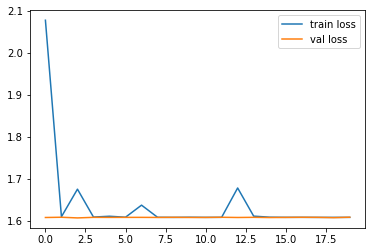

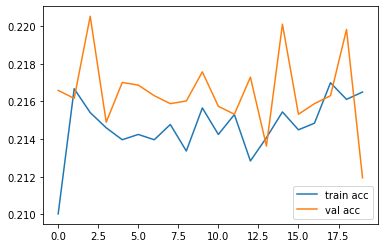

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

### ResNet50

In [22]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential

In [29]:
IMAGE_SIZE = [300,300]
resnet50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in resnet50.layers:
    layer.trainable = False
x = Flatten()(resnet50.output)
prediction = Dense(5, activation='softmax')(x)
model = Model(inputs=resnet50.input, outputs=prediction)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 306, 306, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [30]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [33]:
r = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=10,
  steps_per_epoch=568,
  validation_steps=143
)
model.save('clahe_resnet50.h5')

Epoch 1/10
568/568 [==============================] - 3527s 6s/step - loss: 7.7356 - accuracy: 0.2220 - val_loss: 5.1244 - val_accuracy: 0.2293
Epoch 2/10
568/568 [==============================] - 3537s 6s/step - loss: 5.3535 - accuracy: 0.2413 - val_loss: 6.3814 - val_accuracy: 0.2224
Epoch 3/10
568/568 [==============================] - 3564s 6s/step - loss: 6.4749 - accuracy: 0.2404 - val_loss: 14.4793 - val_accuracy: 0.1977
Epoch 4/10
568/568 [==============================] - 3526s 6s/step - loss: 5.3417 - accuracy: 0.2468 - val_loss: 5.7778 - val_accuracy: 0.3067
Epoch 5/10
568/568 [==============================] - 3501s 6s/step - loss: 5.9000 - accuracy: 0.2457 - val_loss: 6.5998 - val_accuracy: 0.1967
Epoch 6/10
568/568 [==============================] - 3550s 6s/step - loss: 5.7043 - accuracy: 0.2548 - val_loss: 3.9809 - val_accuracy: 0.2418
Epoch 7/10
568/568 [==============================] - 3594s 6s/step - loss: 5.0705 - accuracy: 0.2592 - val_loss: 4.0962 - val_accuracy

C:\Users\fahim\Anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


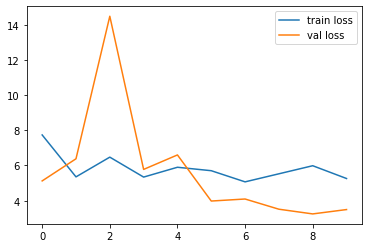

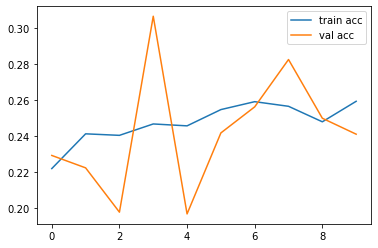

<Figure size 432x288 with 0 Axes>

In [34]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

### VGG16

In [5]:
model = Sequential()
model.add(Conv2D(input_shape=(300,300,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=5, activation="softmax"))
model._name = "VGG16"
model.summary()

Model: "VGG16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 300, 300, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 150, 150, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 256)       295168

In [6]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [9]:
r = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=10,
  steps_per_epoch=1420,
  validation_steps=356
)
model.save('clahe_vgg16.h5')

Epoch 1/10
1420/1420 [==============================] - 3534s 2s/step - loss: 1.6108 - accuracy: 0.2128 - val_loss: 1.6078 - val_accuracy: 0.2164
Epoch 2/10
1420/1420 [==============================] - 3521s 2s/step - loss: 1.6078 - accuracy: 0.2164 - val_loss: 1.6076 - val_accuracy: 0.2167
Epoch 3/10
1420/1420 [==============================] - 3517s 2s/step - loss: 1.6078 - accuracy: 0.2164 - val_loss: 1.6076 - val_accuracy: 0.2164
Epoch 4/10
1420/1420 [==============================] - 3531s 2s/step - loss: 1.6077 - accuracy: 0.2164 - val_loss: 1.6075 - val_accuracy: 0.2163
Epoch 5/10
1420/1420 [==============================] - 3523s 2s/step - loss: 1.6077 - accuracy: 0.2164 - val_loss: 1.6076 - val_accuracy: 0.2163
Epoch 6/10
1420/1420 [==============================] - 3526s 2s/step - loss: 1.6077 - accuracy: 0.2164 - val_loss: 1.6075 - val_accuracy: 0.2160
Epoch 7/10
1420/1420 [==============================] - 3527s 2s/step - loss: 1.6077 - accuracy: 0.2164 - val_loss: 1.6076 -

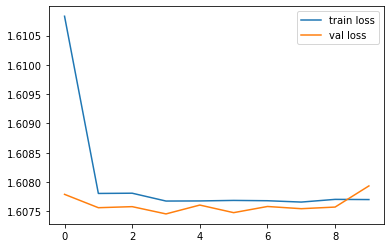

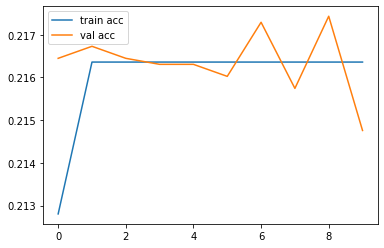

<Figure size 432x288 with 0 Axes>

In [10]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

### VGG19

In [16]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

In [21]:
IMAGE_SIZE = [300,300]
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg19.layers:
    layer.trainable = False
x = Flatten()(vgg19.output)
x = Dense(4096, activation = 'relu')(x)
x = Dense(4096, activation = 'relu')(x)
prediction = Dense(5, activation='softmax')(x)
model = Model(inputs=vgg19.input, outputs=prediction)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0   

In [5]:
inputs = tf.keras.Input(shape=(300, 300, 3))

# REMOVE THE `raise NotImplementedError()` line first
# your code should take the input layer, and process it to produce the output
# as shown in the paper
# YOUR CODE HERE
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(inputs)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
block1_output = tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(block1_output)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
block2_output = tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(block2_output)
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv4')(x)
block3_output = tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(block3_output)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv4')(x)
block4_output = tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(block4_output)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv4')(x)
block5_output = tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)
x = tf.keras.layers.Flatten(name='flatten')(block5_output)
x = tf.keras.layers.Dense(4096, activation = 'relu', name='fc1')(x)
x = tf.keras.layers.Dense(4096, activation = 'relu', name='fc2')(x)
outputs = tf.keras.layers.Dense(5, activation="softmax", name = 'predictions')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="vgg19")
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

In [22]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
r = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=10,
  steps_per_epoch=2840,
  validation_steps=711
)
model.save('clahe_vgg19.h5')

Epoch 1/10
2840/2840 [==============================] - 3636s 1s/step - loss: 1.6326 - accuracy: 0.2133 - val_loss: 1.6081 - val_accuracy: 0.2164
Epoch 2/10
2840/2840 [==============================] - 3633s 1s/step - loss: 1.6110 - accuracy: 0.2133 - val_loss: 1.6082 - val_accuracy: 0.2164
Epoch 3/10
 350/2840 [==>...........................] - ETA: 45:47 - loss: 1.6080 - accuracy: 0.2097